In this notebook I have implemented a simple but powerful filter to fetch the names and address out of the resumes. This code works but it mostly dependent upon the data. In case if the database don't contain the unique words it will not be fruitful.

In [19]:
import sys
sys.path.append('../../code-piece/')

import pandas as pd
import spacy
import nltk
from nltk.corpus import wordnet as wn
import re

In [2]:
df = pd.read_csv('../data/csvs/content.csv')

In [3]:
df.head()

,content,label
0,\nPROFILE \n \n• Having 8+ years of busines...,0
1, +91 96373 37939\n shwetadinde@gmail.com\n ...,0
2,DEV JOYDEB GUHA\nB. Tech. - Electronics & Comm...,0
3,Mahajan Bhushan Dyaneshwar \n\nEmail: bhushanm...,0
4,SHUBHANKAR GAYAL\n\nsgayal13@gmail.com\n\n800...,0


In [4]:
df['content'][0]

' \nPROFILE \n  \n•  Having 8+ years of business acumen as Data Analyst/Analytics with expertise in handling \nthe projects with a larger group of stakeholders leveraging excellent analytical and logical \nskills. 6 years of business acumen into BFSI domain \n\n•  Experience using predictive modeling, data processing and machine learning algorithms \n\nJaydeep Kakadiya \n\nto solve challenging business problems.  \n\n•  Specialized in analyzing and interpreting data to drive better business solution.  \n•  Excellent experience providing solutions on BI and visualization tools.  \n•  B E (I.T) from University of Pune (2012) \n•  Strong acumen to visualize and convey complex ideas in lucid manner \n \nWORK EXPERIENCE \n  \nSenior Cluster Manager – Analytics, Bajaj Finance Ltd (Jan’20 – till date) \n\n• \n\n• \n\n• \n\nLeading BI and Analytics team to provide analytical & visualized solutions to drive \ndigital business. \nSuccessfully designed and develop digital savvy customer segmentat

In [5]:
nlp = spacy.load('en_core_web_lg')

In [6]:
word_listt = [i for i in wn.words(lang='eng')]

In [7]:
len(word_listt)

147306

In [8]:
ds_wods = pd.read_csv('../data/csvs/data_science_words.csv',index_col=False)

In [9]:
ds_wods.head()

,words
0,excel
1,quora
2,flask
3,python
4,nlp


In [10]:
def ds_filter(word,data_science_word_list):
    filter_ = 0
    for ds_word in data_science_word_list:
        if ds_word in word:
            filter_ = 1
            break
    if filter_ ==  1:
        return ''
    else:
        return word

In [30]:
def name_filter(df,data_science_word_list):
    for i in range(len(df)):
        
        print(f'Index starting is {i}')

        text = df['content'][i]
        text = re.sub('\n',' ',text)
        text = re.sub('\W+',' ', text)
        #print(text)
        #break
        doc = nlp(text)
        # for entity in doc.ents:
        #     print(f'{entity.text} --> {(entity.label_ == "PERSON")}')
        
        

        for token in doc.ents:
            if token.text.lower() not in word_listt:
                if token.label_ == 'PERSON':
                    word = ds_filter(token.text.lower(),data_science_word_list)
                    if len(word) != 0:
                        #print(f'{i} --> {token.text.lower()}')
                        print(f'{token.text.lower()}')
        
        print()

In [13]:
data_science_word_list = list(ds_wods['words'])

In [31]:
name_filter(df,data_science_word_list)

Index starting is 0
jaydeep kakadiya
jaydeep1989 patel gmail

Index starting is 1
shweta dinde
sr qc
hindi marathi
key achievement

Index starting is 2
vishwanath karad
morse code encryptor
codevita
hindi marathi
amar deshmukh

Index starting is 3
mahajan bhushan dyaneshwar email
bhushan mahajan 06343767
boruta

Index starting is 4
shubhankar gayal sgayal13 gmail com 8007989189
classiﬁes
classiﬁer linkdin
shubhankar gayal 196168177

Index starting is 5
pawan singh psannusingh gmail com 918828287308
pawan singh 53b28ab0 https github

Index starting is 6

Index starting is 7
jenkin basic
anand h 06b1b9127

Index starting is 8
subhash chandra bose kondapalli
qwiklabs

Index starting is 9
abhinav rai

Index starting is 10
kiran bhagat
hemant palivela eclerx senior managereducation
gmail com reference

Index starting is 11
shanker yadav

Index starting is 12
deepak tiwari
deepak tiwari 371104198
deepak tiwari father s
mr n d tiwari mother s
deepak tiwari date place

Index starting is 13
pra

eric matthes

Index starting is 132
coe16b020 iiitdm ac
classiﬁcation classiﬁed

Index starting is 133
akash gupta pune
spoorthi wave ii id
spoorthi wave
spoorthi wave
ggplot
max accuracy
andrew ng

Index starting is 134
shubham wakchaure
andrew ng coursera
mel frequency spectrograms

Index starting is 135
vijay b42521151
gmail
techniques

Index starting is 136

Index starting is 137
rujuta kharade
ab initio talend
talend
talend

Index starting is 138
momin nabeel ahmed riyaz ahmed
gmail
multilable
shayaris
nabeel ahmed

Index starting is 139
shravan ks9 gmail

Index starting is 140
andrew ng

Index starting is 141
gaurav pasupuleti
george dadar
marlin skipjack
yellowfin tuna
bass mahimahi sailfish wahoo
tabla instrument

Index starting is 142
trudeau
nanostructured photocatalyst nio

Index starting is 143
gaurang parekh b e
gaurang parekh3399
gmail com
aniyad chowkdi

Index starting is 144
karan singh pokhariya
karanpokhariya10 gmail

Index starting is 145

Index starting is 146
khadi

In [32]:
txt = df['content'][74]

In [33]:
txt = re.sub('\n',' ',txt)

In [35]:
txt = re.sub('\W+',' ',txt)

In [40]:
docc = nlp(txt)

In [56]:
for token in docc:
    if token.text.lower not in word_listt :
        if len(token.text) != 0:
            word = token.text
            try:
                print(f'{word} --> {wn.lemmas(word)}')
                print(f'{word} --> {wn.synsets(word)}')
            except:
                pass

  --> []
  --> []
Devansh --> []
Devansh --> []
Mittal --> []
Mittal --> []
Phone --> [Lemma('telephone.n.01.phone'), Lemma('phone.n.02.phone'), Lemma('earphone.n.01.phone'), Lemma('call.v.03.phone')]
Phone --> [Synset('telephone.n.01'), Synset('phone.n.02'), Synset('earphone.n.01'), Synset('call.v.03')]
9872394450 --> []
9872394450 --> []
Email --> [Lemma('electronic_mail.n.01.email'), Lemma('e-mail.v.01.email')]
Email --> [Synset('electronic_mail.n.01'), Synset('e-mail.v.01')]
devanshmittal0197 --> []
devanshmittal0197 --> []
gmail --> []
gmail --> []
com --> []
com --> []
Address --> [Lemma('address.n.01.address'), Lemma('address.n.02.address'), Lemma('address.n.03.address'), Lemma('address.n.04.address'), Lemma('address.n.05.address'), Lemma('address.n.06.address'), Lemma('address.n.07.address'), Lemma('savoir-faire.n.01.address'), Lemma('address.v.01.address'), Lemma('address.v.02.address'), Lemma('address.v.03.address'), Lemma('address.v.04.address'), Lemma('address.v.05.address'

2020 --> []
1 --> [Lemma('one.n.01.1'), Lemma('one.s.01.1')]
1 --> [Synset('one.n.01'), Synset('one.s.01')]
Built --> [Lemma('built.s.01.built')]
Built --> [Synset('construct.v.01'), Synset('build_up.v.02'), Synset('build.v.03'), Synset('build.v.04'), Synset('build.v.05'), Synset('build.v.06'), Synset('build.v.07'), Synset('build.v.08'), Synset('build_up.v.04'), Synset('build.v.10'), Synset('built.s.01')]
text --> [Lemma('text.n.01.text'), Lemma('text.n.02.text'), Lemma('textbook.n.01.text'), Lemma('text.n.04.text')]
text --> [Synset('text.n.01'), Synset('text.n.02'), Synset('textbook.n.01'), Synset('text.n.04')]
classification --> [Lemma('categorization.n.03.classification'), Lemma('classification.n.02.classification'), Lemma('classification.n.03.classification'), Lemma('classification.n.04.classification')]
classification --> [Synset('categorization.n.03'), Synset('classification.n.02'), Synset('classification.n.03'), Synset('classification.n.04')]
algorithm --> [Lemma('algorithm.n.0

studies --> []
studies --> [Synset('survey.n.01'), Synset('study.n.02'), Synset('report.n.01'), Synset('study.n.04'), Synset('study.n.05'), Synset('discipline.n.01'), Synset('sketch.n.01'), Synset('cogitation.n.02'), Synset('study.n.09'), Synset('study.n.10'), Synset('analyze.v.01'), Synset('study.v.02'), Synset('study.v.03'), Synset('learn.v.04'), Synset('study.v.05'), Synset('study.v.06')]
and --> []
and --> []
performed --> []
performed --> [Synset('perform.v.01'), Synset('perform.v.02'), Synset('perform.v.03'), Synset('do.v.03')]
complete --> [Lemma('complete.v.01.complete'), Lemma('complete.v.02.complete'), Lemma('dispatch.v.02.complete'), Lemma('complete.v.04.complete'), Lemma('complete.v.05.complete'), Lemma('complete.a.01.complete'), Lemma('complete.s.02.complete'), Lemma('accomplished.s.01.complete'), Lemma('arrant.s.01.complete'), Lemma('complete.s.05.complete')]
complete --> [Synset('complete.v.01'), Synset('complete.v.02'), Synset('dispatch.v.02'), Synset('complete.v.04'), 

Engineering --> [Lemma('technology.n.01.engineering'), Lemma('engineering.n.02.engineering'), Lemma('engineering.n.03.engineering')]
Engineering --> [Synset('technology.n.01'), Synset('engineering.n.02'), Synset('engineering.n.03'), Synset('engineer.v.01'), Synset('mastermind.v.01')]
CGPA --> []
CGPA --> []
8 --> [Lemma('eight.n.01.8'), Lemma('eight.s.01.8')]
8 --> [Synset('eight.n.01'), Synset('eight.s.01')]
16 --> [Lemma('sixteen.n.01.16'), Lemma('sixteen.s.01.16')]
16 --> [Synset('sixteen.n.01'), Synset('sixteen.s.01')]
Internship --> [Lemma('internship.n.01.internship')]
Internship --> [Synset('internship.n.01')]
Bharat --> [Lemma('india.n.01.Bharat')]
Bharat --> [Synset('india.n.01')]
Electronics --> [Lemma('electronics.n.01.electronics')]
Electronics --> [Synset('electronics.n.01')]
Limited --> [Lemma('express.n.02.limited'), Lemma('limited.a.01.limited'), Lemma('circumscribed.s.01.limited'), Lemma('limited.s.03.limited'), Lemma('limited.s.04.limited'), Lemma('limited.s.05.limite

In [52]:
wn.lemmas(token.text)

[Lemma('four.n.01.4'), Lemma('four.s.01.4')]

In [ ]:
data_science_word_list

In [59]:
def filter_2(df,data_science_word_list):
    for i in range(len(df)):
        print(f'The index is {i}')
        text = df['content'][i]
        text = re.sub('\n',' ',text)
        text = re.sub('\W+',' ',text)
        text = text.lower()
        doc = nlp(text)
        for token in doc:
            lemma = wn.lemmas(token.text)
            word = ds_filter(token.text,data_science_word_list)
            if len(lemma) == 0 and len(word) != 0:
                print(token.text)

In [60]:
filter_2(df,data_science_word_list)

The index is 0
 
having
of
analytics
with
the
projects
with
of
stakeholders
and
skills
of
into
bfsi
and
algorithms
jaydeep
kakadiya
to
problems
analyzing
and
to
providing
solutions
and
tools
from
of
pune
2012
to
and
ideas
analytics
bajaj
ltd
and
analytics
to
solutions
to
and
to
their
for
products
platforms
sms
chatbots
created
reports
and
with
and
teams
provided
solutions
for
products
to
and
campaigns
insights
and
analytics
bajaj
allianz
of
and
managing
analytics
projects
to
upsell
campaigns
campaigns
and
geospatial
analytics
projects
created
to
of
roles
policies
standards
and
to
the
and
of
and
to
goals
created
which
provides
the
definitions
of
meanings
and
dqi
for
and
of
analytics
created
to
members
had
with
bajaj
and
them
and
the
of
was
locations
resulted
of
and
fos
autopay
registrations
ucic
ucic
aims
to
of
the
and
their
holdings
and
interactions
the
bajaj
of
companies
provides
and
offerings
to
customers
and
for
initiatives
ennovate
consulting
bajaj
allianz
pune
created
for
the
whic

 
anand
huded
projects
ramping
projects
parameters
per
guidelines
targeting
assignments
with
of
bengaluru
and
a1111nand
gmail
com
9035775928
9986309279
with
of
creating
applications
with
with
libraries
numpy
pandas
matplotlib
of
having
of
with
nosql
mongodb
and
sql
and
sql
skills
of
scripting
and
xml
jenkins
and
trams
pipelines
jenkin
of
of
models
dockers
and
kubernetes
and
phases
of
the
requirements
manipulating
and
analyzing
from
sources
and
sources
and
scrapping
and
started
blogs
with
competencies
reuters
mahindra
bengaluru
scripting
xml
mahindra
bengaluru
reuters
bengaluru
github
https
github
com
anand
cmd
linkedin
https
linkedin
com
anand
06b1b9127
areas
with
and
teams
to
practices
with
to
and
preprocessing
techniques
to
for
creating
models
and
algorithms
libraries
trees
and
naïve
baye
worked
for
the
incidents
and
predicting
for
the
reuters
applications
servicenow
for
reuters
levels
westlaw
for
the
areas
highlights
worked
units
and
scripting
managers
colleagues
for
extracting
and


bharath
mohan
9445606440
bharath2396
gmail
com
to
to
the
my
interests
to
challenges
the
of
and
sri
sairam
of
2014
2018
cgpa
2018
flowserve
sanmar
2018
skills
languages
postgresql
tf
pandas
numpy
libraries
for
and
machining
processes
and
of
the
for
and
of
and
processes
for
components
of
drawings
and
interpretations
and
with
achieved
having
with
my
seniors
and
colleagues
the
tools
and
machining
parameters
with
projects
projects
and
ocr
with
to
and
that
supports
users
with
media
with
features
from
accounts
and
posts
css
js
with
ibm
coursera
for
and
bootcamp
udemy
skills
and
recognitions
and
for
performed
places
and
the
and
accolades
debates
and
programs
the
and
performed
concerts
the
The index is 16
vikas
kumar
7696484603
vikas199842
gmail
com
https
linkedin
com
vikas
kumar
a3558a17b
https
github
com
vikas
kumar
rai
1913
01
sarna
derabassi
nagar
mohali
140507
to
exhibiting
my
skills
with
and
for
the
of
with
worked
api
zapbuild
mohali
from
2020
2020
with
xg
boosting
pca
dbscan
libraries
pa

202
garima
sadan
ashish
dahisar
400068
9892599880
dalvimrunal03
gmail
com
mrunal
yashvant
dalvi
to
that
utilizes
my
and
analytics
skills
and
abilities
that
offers
to
with
where
is
for
linkedin
linkedin
com
mrunal
dalvi
github
https
github
com
mrunald3
https
tinyurl
com
y6kedfjh
skills
numpy
pandas
matplotlib
sql
dml
dcl
ddl
commands
subquery
statements
joins
and
functions
techniques
techniques
microsoft
formulas
and
functions
functions
functions
microsoft
microsoft
powerpoint
2020
2020
to
the
to
of
inputs
and
created
from
providers
logics
to
the
for
categories
of
the
clients
and
upon
tools
and
to
from
the
of
products
to
the
of
inputs
and
created
from
providers
depending
logics
to
the
products
for
the
clients
and
upon
was
to
the
of
to
suggested
to
the
the
tools
and
the
sparks
2020
2020
the
sparks
the
tasks
which
and
models
for
and
predicting
of
the
github
and
for
the
tasks
https
github
com
mrunald3
sparkfoundation
and
https
tinyurl
com
y6oazfvw
tools
and
identifying
patients
for
if
with

gaps
the
outliers
etc
qure
2018
2019
and
models
to
fractures
from
images
unet
and
preprocessing
projects
unet
unet
pretrained
vgg
encoder
to
the
outfits
and
facenet
for
airbnb
listings
the
hotstar
the
which
uses
and
vgg16
to
maps
and
images
to
this
we
counts
of
reviews
for
listings
worked
applying
and
lstm
to
the
of
reviews
for
insights
the
lstm
gave
patterns
segments
to
if
the
advertisements
presented
to
the
achieved
xgboost
to
the
which
scrapes
the
of
the
of
reviews
reviews
worked
the
scraped
to
insights
and
techniques
to
the
reviews
the
created
to
the
sentiments
of
the
reviews
to
the
created
which
customers
of
app
their
to
whether
the
the
and
algorithms
systems
preprocessing
and
ner
languages
libraries
pandas
numpy
matplotlib
etc
frameworks
mongodb
of
extc
bharati
vidyapeeth
of
kharghar
2014
2018
was
which
deployed
cgpa
2018
greyatom
pvt
ltd
The index is 32
sarvajith
461
bengaluru
560027
9480093460
sarvajith
gmail
com
with
of
the
languages
with
of
mtech
vlsi
where
my
skills
to
to
th

2020
essentials
udemy
2020
coursera
2018
2019
coursera
2019
contributions
abhishek
abhisheksalian
hackerearth
abhishek4789
hackerank
abhishekcs26
ahmedabad
cialization
coursera
2020
classiﬁcation
convolutional
gan
achievements
programmed
of
cheapest
2020
got
for
hackathon
avishkar
2020
2020
2019
iot
2018
certiﬁcate
of
and
networks
secured
highest
2017
for
hsc
2016
nso
2012
publications
143
et
2020
classiﬁcation
architectures
2020
and
applications
cscita
pp
168
173
patents
introducing
for
to
and
airﬂow
sensors
with
202021025621
issued
2020
projects
2020
classiﬁcation
2020
pypi
2020
2020
classiﬁcation
ieee
2019
2020
of
2019
2020
recognizer
ipwebcam
2018
2019
2018
2019
The index is 38
vishal
nayak
of
gwalior
vishaln830
gmail
com
ﬂ
https
linkedin
com
vishal
nayak
a9bbb5116
211
8109144698
https
github
com
vishalnayak108
projects
abv
of
gwalior
2015
2020
cbse
kendriya
vidyalaya
raigunj
2012
2013
cbse
kendriya
vidyalaya
raigunj
2010
2011
cgpa
knowdis
2020
and
of
indiamart
embibe
jio
2020
2020

 
vitae
sumedh
sunil
sarangdhar
sssarangdhar
gmail
com
linkedin
https
linkedin
com
sumedh
sarangdhar
9416ab16b
9404287874
7083100074
to
my
and
abilities
the
that
offers
and
of
pune
2019
2020
275
cgpa
of
pune
jun
2017
jun
2014
jun
2012
00
08
of
of
skills
techniques
minitab
pandas
numpy
scipy
spss
with
of
sql
sumedh
sunil
sarangdhar
sunil
nivrutti
sarangdhar
of
renuka
nagar
maparwadi
sinnar
nashik
1996
9404287874
7083100074
strengths
with
with
of
skills
distributions
and
etc
2016
2017
skills
theories
etc
2019
2020
experiance
ianalyst
infotech
pvt
ltd
xgboost
boosting
techniques
pca
lda
svd
etc
knn
svm
ancova
manova
mancova
etc
techniques
etc
2020
2020
awards
and
activities
ncc
with
techniques
and
with
ncc
with
that
mentioned
is
to
my
and
the
for
of
the
mentioned
particulars
nasik
2020
sarangadhar
The index is 46
rohan
kokkula
8169913335
rohankokkula01
gmail
com
rohankokkula
rohankokkula
with
sql
to
of
insights
problems
solutions
to
with
ui
my
interests
creating
projects
and
concepts
my
y

to
teams
to
The index is 56
 
sutirtha
bhattacharyya
and
analytics
applications
to
and
achievements
the
of
and
consulting
solutions
pune
solutions
2018
payments
cases
chargeback
underwriting
pune
9123872871
8902801220
sutirthab
com
github
linkedin
skills
languages
chatbot
worked
algorithms
with
to
stages
the
eda
pipelines
tools
libraries
backend
and
js
for
of
applications
of
and
of
propellus
pune
2017
2018
to
amounts
of
from
sources
and
insights
jira
concepts
for
the
of
and
kerala
with
2016
2018
02
with
asutosh
2013
2016
with
js
sql
mongodb
dialogflow
projects
chatbot
chatbot
to
of
aiml
files
and
these
files
to
queries
pertaining
to
the
of
phones
languages
interests
zones
the
of
kerala
models
which
were
the
and
properties
of
the
sports
trekking
of
regions
the
of
pubmed
documents
that
classifies
whether
from
is
of
parameters
techniques
and
restored
images
sampled
techniques
and
and
compared
the
parameters
obtained
methods
The index is 57
 
swathi
raikwar
9310615597
raikwarswati9
gmail
c

taught
and
of
algorithms
structures
concepts
and
and
notes
and
proctored
2011
2013
examinations
and
projects
of
courses
taught
networks
languages
to
to
mentored
and
projects
notes
and
2009
2011
for
the
abled
linkedin
The index is 66
202
shroff
soleno
mahalunge
pune
411045
8875238733
of
1994
09
shubham77mandowara
gmail
com
linkedin
linkedin
com
shubha
mmandowara
github
https
github
com
shubham
mandowara
https
com
shub
ham57
https
com
mando
wara
to
my
with
that
my
and
skills
of
analytics
and
to
and
skills
numpy
pandas
shubham
mandowara
analytics
and
dept
of
and
and
researching
applying
and
iit
professors
and
and
from
quant
and
vidhya
shubham57
with
among
and
blogging
com
and
firstalign
06
2019
applying
and
of
and
predicting
and
for
with
and
for
for
for
and
and
tata
08
2017
2018
and
mvc
of
tcs
months
for
mvc
scripting
for
was
to
and
for
insides
and
for
mvc
skills
matplotlib
sql
and
languages
among
projects
nn
from
and
for
predicting
from
to
for
with
and
matplotlib
and
and
to
dnn
songs
to


manikandan
manikandanm9792
gmail
com
7892909143
mlp
of
and
of
applications
technologies
frameworks
of
mis
of
macros
applications
for
login
with
teams
of
skills
mvc
jpa
methodologies
with
netbeans
intellij
pycharm
phases
of
configuring
and
maintaining
applications
with
and
skills
analytics
pre
oop
numpy
functions
oop
algorithms
forests
2019
to
and
managers
mis
kart
from
for
creating
and
to
for
creating
and
to
for
creating
and
reports
of
allocations
and
preparations
the
emi
payments
to
customers
checking
payments
and
the
customers
for
and
the
for
and
the
and
preparing
and
mangers
and
msoffice
and
to
efforts
vlookup
hlookup
tlookup
forms
scenarios
codeapps
trivandrum
2017
to
2019
created
and
frontend
css
for
worked
admin
to
handedly
to
tools
frameworks
mvc
postgres
sql
jquery
html5
javascript
css
my
sql
responsibilities
this
is
registrations
for
this
we
the
for
this
for
hosting
and
jsps
and
servlet
screens
dhtml
css
jsp
and
javascript
for
the
and
this
is
and
errors
to
for
and
of
applicati

models
and
from
techniques
xgbboost
predicted
whether
has
of
employer2
pune
vidyarthi
girah
of
2015
2018
had
worked
pune
vidyarthi
girah
of
for
lectures
with
lectures
the
and
for
of
mcs
had
plsql
postgresql
and
employer3
solutions
was
solutions
was
the
was
to
the
deals
and
the
deals
the
was
to
with
users
sms
etc
responsibilities
2012
2012
komal
jagtap
The index is 85
thaker
917073580025
adityathaker01
gmail
com
to
which
encourages
to
and
where
my
skills
and
exponentia
worked
the
for
problems
2020
2020
exponentia
of
the
for
projects
to
bots
and
chatbots
2020
2015
2019
2019
2020
manipal
jaipur
btech
and
lakes
of
skills
mongodb
projects
for
replying
to
customers
which
categories
the
emails
and
sends
the
to
the
users
clients
sbi
motilal
oswal
qna
replying
the
queries
of
citizens
chatbot
categorizing
the
into
classes
and
the
documents
pdfs
to
those
ocr
of
departmentofwomen
and
achievements
awards
performace
exponentia
The index is 86
snehashis
chatterjee
barasat
24pgs
kol
700124
snehashisch

sakil
ansari
04
sannidhi
bds
nagar
of
and
mtech
ing
and
with
of
analyt
ics
libraries
numpy
pandas
matplotlib
powerbi
for
ization
sql
nosql
for
and
cases
to
named
velopment
projects
ramping
projects
parameters
per
guidelines
geting
assignments
and
and
experi
ence
analytics
nology
worked
stitute
of
iisc
from
2017
to
2017
worked
stitute
of
iit
from
2016
to
2016
worked
learnin
tant
jntuh
worked
assis
560077
8179685293
sakilansari4
gmail
com
with
and
ing
teams
to
prac
tices
with
to
and
preprocessing
techniques
to
for
creating
models
and
classiﬁcation
algorithms
libraries
trees
and
providing
the
for
and
manipulating
and
analyzing
com
plex
from
sources
and
sources
with
activities
engi
neering
analyzing
the
the
projects
lyst
with
tools
for
managers
colleagues
and
peers
for
and
to
infosys
pvt
ltd
projects
skillset
pyspark
jave
javascript
powerbi
hadoop
ibm
sql
nosql
platforms
and
misc
spyder
ide
pycharm
photshop
products
for
extracting
preprocessing
and
eda
was
performed
the
was
and
classiﬁed
t

 
lokare
pune
8668769415
2017mec009
sggs
github
com
anil2k
languages
with
where
my
skills
for
the
and
with
and
ﬂexible
nielit
meity
govt
of
pg
and
analytics
sggs
nanded
rit
sangli
07
naaniz
rasa
ocr
skills
api
sql
and
nosql
chatbot
rasa
dialogﬂow
2021
2019
2016
09
2020
projects
from
images
is
from
images
its
and
these
measurements
to
the
of
spooﬁng
and
the
ﬁrst
lbp
features
from
rgb
ycbcr
hvc
spaces
extracted
and
svm
for
classiﬁcation
the
is
for
the
classiﬁcation
of
and
faces
is
for
selecting
the
for
the
of
consumers
the
generators
and
generators
to
the
of
generations
interests
techniques
artiﬁcial
and
and
coursera
networks
coursera
coursera
mnit
jaipur
jalandhar
and
jalandhar
that
the
is
and
to
the
of
my
lokare
The index is 104
srushti
pisal
srushti10stat
gmail
com
ﬂ
https
linkedin
com
srushti
pisal
211
8208705549
9403005020
pune
sciﬀer
analytics
2020
yolo
darknet
ent
emotions
for
objects
the
pune
for
for
diﬀer
classiﬁcation
and
from
faces
from
faces
worked
named
recogniser
named
reco

 
vishal
itware
9284478991
patilvishal1919
gmail
com
karve
nagar
pune
for
the
to
of
where
and
my
myself
into
the
and
to
to
having
of
modules
of
the
and
ecommerce
frontend
of
the
technologies
the
of
for
and
the
and
the
of
modules
for
and
and
technologies
pages
css
of
with
solutions
pvt
ltd
pune
from
2017
to
technologies
skills
languages
pyspark
scala
ec2
technologies
css
ide
and
tools
sts
pycharm
others
sql
kubernetes
with
cgpa
passed
bachelors
of
and
from
amravati
passed
and
from
msbte
with
of
passed
and
from
with
passed
from
with
roles
responsibilit
ies
solutions
pvt
ltd
labeling
svm
the
is
to
of
stages
of
this
is
physicists
to
with
the
techniques
gpus
pre
which
involves
of
images
and
created
frames
from
the
images
and
labeling
and
matrices
extracted
techniques
for
with
visualizations
ggplot
discrepancies
to
and
with
patterns
of
to
and
for
and
techniques
forests
svm
the
accuracies
that
of
to
of
exists
ecommerce
solutions
pvt
ltd
networks
tasks
the
ecommerce
that
tasks
of
millions
of
p

tanveer
mustafa
tanveermustafa125
gmail
com
9361130110
linkedin
tanveer
mustafa
bhavishya
ias
adyar
600020
to
and
to
solutions
to
the
problems
of
of
and
cgpa
ld
of
of
cgpa
kendriya
vidyalaya
certiﬁcate
kendriya
vidyalaya
certiﬁcate
cgpa
languages
css
javascript
php
libraries
frameworks
numpy
pandas
dask
pil
tools
platforms
spyder
ecllipse
pycharm
systems
agnli
yolov3
inceptionv2
yolov5
tangoit
identiﬁcation
for
identifying
the
speciﬁed
objects
models
the
and
doing
ﬁne
optimisations
the
for
objects
identiﬁed
to
the
of
the
the
for
identifying
the
customers
the
for
entries
the
and
introduced
of
extracting
20x
features
resulting
identiﬁcation
identiﬁcation
for
timestamps
from
cameras
the
for
of
the
with
to
timestamps
and
frames
obtained
from
of
of
and
identiﬁcation
to
individuals
for
optimised
the
to
4x
numpy
to
of
the
from
the
from
the
customised
of
of
for
of
customers
and
engineers
drdo
pune
2018
2019
and
for
for
providing
areas
pune
2017
2019
ahmedabad
2013
2017
jamnagar
2011
2012
jamna

 
satyapriya
chaudhari
9810880751
satyapriya
chaudhari
gmail
com
linkedin
https
linkedin
com
satyapriya
chaudhari
73976b16a
with
of
and
of
and
skills
languages
tools
sql
numpy
pandas
matplotlib
concepts
algorthm
custering
pvt
ltd
jun
creating
and
for
the
students
and
professionals
the
of
for
projects
for
the
ide
app
with
than
50k
learners
the
and
of
reports
and
dashboards
to
decisions
and
concepts
to
the
with
the
learners
to
the
courses
and
administered
to
students
for
kumon
pvt
ltd
jun
queries
extracted
from
the
and
performed
visualizations
to
the
of
to
students
this
resulted
the
ltd
worked
and
with
clients
the
quatrro
analytics
and
ltd
variables
and
created
the
combinations
for
and
having
segments
for
the
customers
notified
the
their
resulted
of
hons
from
kirori
mal
with
isc
pcmc
from
beldih
jamshedpur
cisce
with
icse
eng
cts
from
beldih
jamshedpur
cisce
with
months
and
foundations
of
and
gaining
skills
months
offered
of
nsso
fod
bhubaneswar
projects
the
involves
predicting
requests


and
to
deeper
the
of
and
possesses
towards
and
to
and
to
technologies
of
pune
2016
2020
cgpa
sri
chaitanya
kalasala
2014
2016
sri
chaitanya
2013
2014
cgpa
capguide
2020
2020
worked
scripts
to
the
from
to
and
populating
the
with
worked
the
to
insights
for
the
customers
2020
jul
2020
worked
and
and
to
for
generating
from
sketches
explored
and
of
the
models
and
assembled
their
drawbacks
for
converting
to
5d
and
5d
to
open3d
computed
the
and
our
generates
abv
of
and
gwalior
2019
2019
is
which
degrades
the
for
noising
identifies
and
classifies
the
images
the
to
categories
and
removes
models
filters
of
2018
2018
the
of
the
of
with
for
connecting
customers
and
retailers
captioning
flickr8k
which
is
with
features
and
encodings
to
for
features
extracted
and
encodings
cleaned
tokenized
and
into
lstm
with
features
vectors
containing
brands
of
bottles
and
the
to
bounding
boxes
the
inputs
to
bounding
boxes
results
to
projects
arima
and
predicted
the
its
of
and
arima
to
the
of
structures
and
algorit

analytics
roles
responsibilities
wrote
scripts
into
scripting
to
approx
and
coded
applications
for
to
the
clusters
analytics
modules
and
to
opinions
projects
amadeus
pandas
numpy
we
analysed
for
airlines
how
they
upsell
factors
for
searches
bookings
worked
insights
how
systems
gave
results
amadeus
svm
we
worked
influenced
airlines
and
markets
markets
and
customers
to
of
pandas
numpy
we
analysed
the
cleaned
worked
of
retweets
with
hashtags
of
the
tweets
of
tweets
and
retweets
tweets
and
skema
2019
2020
and
tssm
bhivarabai
pune
2013
2017
hsc
2013
ssc
2011
analytics
ibm
for
ibm
with
awards
for
walgreens
the
managers
for
of
the
The index is 138
momin
nabeel
ahmed
riyaz
ahmed
mominnabeelahmed123
gmail
com
8087437128
01
roshan
pudumji
pune
pune
411001
of
08
05
1996
languages
to
where
would
to
my
capabilities
to
the
and
the
to
the
and
my
hsc
ssc
of
and
mescoe
pune
sppu
pune
2019
the
malegaon
malegaon
swes
malegaon
hsc
ssc
2014
2012
from
2019
woking
that
the
from
preprocess
and
that
deployed
h

and
of
moores
of
the
sayajirao
of
baroda
vadodara
pratap
amalner
jalgaon
the
of
is
to
the
of
the
and
of
cars
and
to
the
of
our
we
presented
to
the
with
and
hypotheses
of
the
and
to
them
and
the
of
this
was
to
methods
and
architectures
for
for
models
and
the
of
of
and
2015
projects
of
The index is 146
khadija
koshish
projects
skills
certiﬁcations
creating
models
and
analyzing
algorithms
to
insights
and
solutions
to
problems
khadijadb1991
gmail
com
7728851666
pune
linkedin
github
eda
2020
2020
2020
2020
2020
2020
2020
20200
2020
2020
bea
mjobs
numpy
pandas
matplotllib
certiﬁcation
with
udemy
certiﬁcation
udemy
certiﬁcation
with
udemy
analytics
govt
pg
2010
2014
baran
certiﬁcation
with
udemy
certiﬁcation
udemy
certiﬁcation
with
udemy
certiﬁcation
to
certiﬁcation
certiﬁcation
The index is 147
and
nanodegree
udacity
com
2020
ibm
coursera
org
2020
coursera
org
2020
codingblocks
com
2020
and
of
2021
ugc
cgpa
phagwara
2017
2015
pseb
ludhiana
sxhool
pseb
ludhiana
afsar
models
which
with
analyse

avranil
basu
916
3893
231
avranil26
gmail
com
avranil
basu
avranil26
138
avranilbasu
skills
languages
frameworks
tools
of
and
gcect
of
2015
2019
sql
fbprophet
matplotlib
numpy
pandas
textblob
pptx
sagemaker
netezzasql
sqlserver
convergytics
solutions
pvt
ltd
2019
to
which
customers
of
and
to
the
to
models
for
to
the
to
for
buyers
this
helped
the
to
and
targeting
their
customers
eﬀectively
created
to
the
and
campaigns
contacting
the
customers
to
speciﬁc
to
the
customers
from
the
of
campaigns
clusters
for
to
the
operationalize
decisions
and
oﬀers
for
multi
to
locations
and
for
to
insights
and
to
and
eﬀective
convergytics
solutions
pvt
ltd
2018
2019
worked
for
goods
implementing
worked
to
for
of
the
to
from
to
for
lines
13000
sku
projects
onboarding
studies
created
saas
for
studies
for
for
ﬁnancial
having
ﬁnancial
with
knn
of
diﬀerent
versions
for
ﬂow
d2d
compared
the
obtained
diﬀerent
implementations
simulte
lte
which
simulates
the
of
the
lte
lte
volunteering
ordinator
gcect
gcect
gcect


 
polepelli
reddy
telangana
if
buddhareddy
polepelli
gmail
com
8501030103
9440885516
dob
1989
https
linkedin
com
2020
telangana
algorithms
that
problems
with
and
the
of
creating
with
of
implementing
graphs
ensembles
and
models
and
tools
and
implementing
models
and
algorithms
utilizing
sources
of
to
problems
the
technologies
and
and
applications
methods
hyper
optimizations
visualizations
solutions
solutions
2018
2020
2017
2018
vardhaman
of
2014
2017
sumathi
reddy
of
for
women
2011
2014
ramappa
2010
2011
solutions
of
duties
creating
and
strategies
to
the
of
materials
the
the
of
the
and
creating
carrying
and
algorithms
to
measures
assessing
opportunities
to
for
of
optimizer
and
predicting
from
to
the
during
analysing
the
and
of
svm
xgboost
adaboost
trees
and
boosting
techniques
knn
models
ann
rnn
lstm
models
lda
lsa
ner
pos
tagging
and
embedding
models
tf
solutions
carried
duties
cleansed
generated
to
and
outliers
applications
for
of
variables
and
vif
and
capping
anomalies
methods
customi

etc
of
1995
languages
that
the
statements
and
to
the
of
my
your
prafull
potekar
The index is 168
satyendra
singh
8072129507
satyen851
gmail
com
skills
and
seeks
to
with
tools
to
for
linkedin
https
linkedin
com
satyendra
singh
languages
for
analytics
and
and
optimizing
sql
statements
projects
rfm
for
to
rfm
and
clusters
for
and
suggestions
targeting
the
customers
strategies
highest
for
the
skills
knn
to
customers
to
the
and
to
for
customers
the
of
skills
linkedin
sql
linkedin
lakes
of
2020
remarks
2016
of
rishra
vidyapith
2012
rishra
vidyapith
2010
certificates
12thstd
10thstd
satyendra
singh
8072129507
satyen851
gmail
com
tcs
2016
2019
worked
called
mft
for
transfers
with
of
300k
files
per
ensuring
standards
for
vendors
and
servers
sftp
ftps
https
protocols
bpa
processes
and
and
to
the
and
applications
of
the
created
rpa
and
with
and
rpa
solutions
to
processes
debugging
and
worked
sql
to
created
sql
scripts
and
procedures
sql
to
from
files
into
tables
customers
requests
cntrl
and
and
d

In [71]:
def word_freq(df):
    
    word_frequency = {}
    tokens = []
    for i in range(len(df)):
        text = df['content'][i]
        text = re.sub('\n',' ',text)
        text = re.sub('\W+',' ',text)
        text= text.lower()
        doc = nlp(text)
        for token in doc:
            tokens.append(token.text)
            if token.text in word_frequency.keys():
                word_frequency[token.text] = word_frequency[token.text] + 1
            else:
                word_frequency[token.text] = 1
    return word_frequency,tokens


In [72]:
word_frequency,tokens = word_freq(df)

In [66]:
word_frequency

{' ': 50,
 'profile': 45,
 'having': 31,
 '8': 85,
 'years': 66,
 'of': 2128,
 'business': 194,
 'acumen': 8,
 'as': 336,
 'data': 1480,
 'analyst': 76,
 'analytics': 200,
 'with': 717,
 'expertise': 22,
 'in': 1677,
 'handling': 20,
 'the': 2262,
 'projects': 225,
 'a': 1094,
 'larger': 1,
 'group': 24,
 'stakeholders': 3,
 'leveraging': 4,
 'excellent': 22,
 'analytical': 37,
 'and': 3050,
 'logical': 7,
 'skills': 312,
 '6': 77,
 'into': 84,
 'bfsi': 1,
 'domain': 51,
 'experience': 266,
 'using': 756,
 'predictive': 73,
 'modeling': 48,
 'processing': 169,
 'machine': 517,
 'learning': 837,
 'algorithms': 150,
 'jaydeep': 1,
 'kakadiya': 1,
 'to': 1636,
 'solve': 22,
 'challenging': 30,
 'problems': 45,
 'specialized': 1,
 'analyzing': 33,
 'interpreting': 5,
 'drive': 17,
 'better': 29,
 'solution': 72,
 'providing': 21,
 'solutions': 84,
 'on': 742,
 'bi': 35,
 'visualization': 92,
 'tools': 107,
 'b': 159,
 'e': 230,
 'i': 329,
 't': 97,
 'from': 360,
 'university': 165,
 'pune'

In [69]:
vocabulary = set(list(word_frequency.keys()))

In [74]:
import nltk

In [91]:
frequency_dist1 = nltk.FreqDist(tokens)

In [76]:
frequency_dist

FreqDist({'and': 3050, 'the': 2262, 'of': 2128, 'in': 1677, 'to': 1636, 'data': 1480, 'for': 1240, 'a': 1094, 'learning': 837, '_': 831, ...})

In [77]:
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

['and',
 'the',
 'of',
 'in',
 'to',
 'data',
 'for',
 'a',
 'learning',
 '_',
 'using',
 'on',
 'with',
 'python',
 'machine',
 'project',
 'analysis',
 'model',
 'by',
 'science',
 'com',
 '2020',
 'from',
 'as',
 '2019',
 's',
 'i',
 'skills',
 'is',
 'deep',
 'engineering',
 'used',
 'experience',
 'india',
 'based',
 'r',
 'an',
 'c',
 '2018',
 'e',
 'projects',
 'system',
 'technology',
 'that',
 'analytics',
 'which',
 '2',
 'business',
 'sql',
 'models']

In [78]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
updated_tokens = [w for w in tokens if not w in stop_words]

In [79]:
frequency_dist = nltk.FreqDist(updated_tokens)

In [80]:
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

['data',
 'learning',
 '_',
 'using',
 'python',
 'machine',
 'project',
 'analysis',
 'model',
 'science',
 'com',
 '2020',
 '2019',
 'skills',
 'deep',
 'engineering',
 'used',
 'experience',
 'india',
 'based',
 'r',
 'c',
 '2018',
 'e',
 'projects',
 'system',
 'technology',
 'analytics',
 '2',
 'business',
 'sql',
 'models',
 'image',
 'team',
 'regression',
 'computer',
 'developed',
 'education',
 '2017',
 'detection',
 'processing',
 'work',
 'university',
 'software',
 'gmail',
 '2016',
 '1',
 'b',
 'time',
 'algorithms']

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


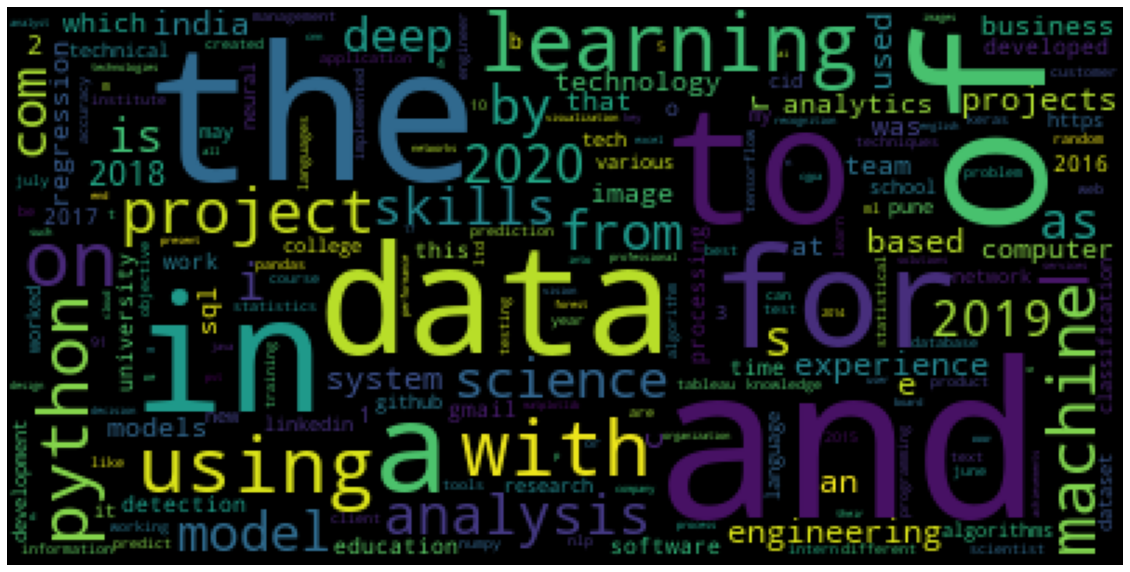

In [92]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

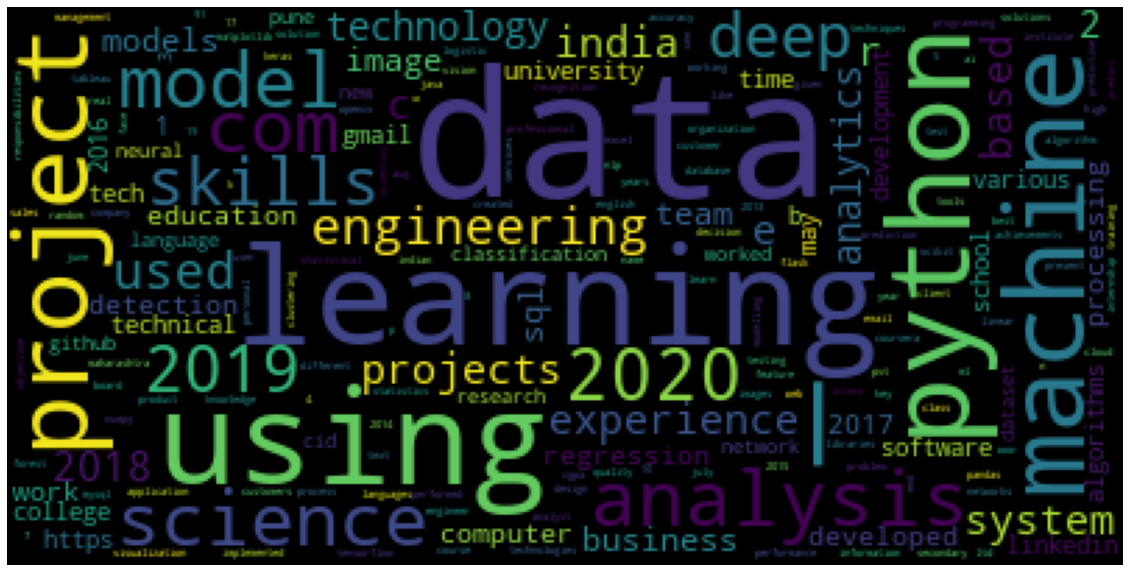

In [97]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()